In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
colors_ns = {
    1: 'r',
    2: 'm',
    3: 'b',
    4: 'k',
    5: 'g'
}

In [3]:
def filter_df_by_n(df, filter_statement, ns, sorting_column):
    result = {}
    
    for n in ns:
        result[n] = df[filter_statement & (df['n'] == n)]
        result[n] = result[n].sort_values([sorting_column])
    
    return result

In [4]:
def filter_df(df, filter_statement, sorting_column):
    result = df[filter_statement]
    result = result.sort_values([sorting_column])
    
    return result

In [5]:
def plot_weights(dataframe, ns, num_dense, num_nodes):
    uniform_statement = (dataframe['num_dense'] == num_dense) & (dataframe['num_nodes'] == num_nodes)
    
    data_uniform = filter_df_by_n(dataframe, uniform_statement, ns, 'weights')
    
    for n in ns:
        plt.plot(data_uniform[n]['weights'], data_uniform[n]['test_metric'], '*--', label='n = {}'.format(n))
    
    plt.xlabel('$\omega_{initial}$')
    plt.ylabel('L$_2$ relative error')
    plt.yscale('log')
    plt.xscale('log')
    plt.legend()
    plt.savefig('weights.png')

In [6]:
def plot_layers(dataframe, reference_dataframe, ns, num_nodes, weights, ref_train=32, ref_nodes=None):
    if ref_nodes is None:
        ref_nodes = num_nodes
    
    pinn_statement = (dataframe['num_nodes'] == num_nodes) & (dataframe['weights'] == weights)
    reference_statement = (reference_dataframe['num_nodes'] == ref_nodes) & (reference_dataframe['num_train'] == ref_train)
    
    data_pinn = filter_df_by_n(dataframe, pinn_statement, ns, 'num_dense')
    data_ref = filter_df_by_n(reference_dataframe, reference_statement, ns, 'num_dense')

    for n in ns:
        plt.plot(data_pinn[n]['num_dense'], data_pinn[n]['test_metric'], '{}*--'.format(colors_ns[n]), label='n = {}'.format(n))
        plt.plot(data_ref[n]['num_dense'], data_ref[n]['test_metric'], '{}-'.format(colors_ns[n]), label='n = {}, reference'.format(n))
    
    plt.xlabel('number of layers')
    plt.ylabel('L$_2$ relative error')
    plt.yscale('log')
    plt.legend()
    plt.savefig('layers.png')

In [7]:
def plot_nodes(dataframe, reference_dataframe, ns, num_dense, weights, ref_train=32):
    pinn_statement = (dataframe['num_dense'] == num_dense) & (dataframe['weights'] == weights)
    ref_statement = (reference_dataframe['num_dense'] == num_dense) & (reference_dataframe['num_train'] == ref_train)
    
    data_pinn = filter_df_by_n(dataframe, pinn_statement, ns, 'num_nodes')
    data_ref = filter_df_by_n(reference_dataframe, ref_statement, ns, 'num_nodes')
    
    for n in ns:
        plt.plot(data_pinn[n]['num_nodes'], data_pinn[n]['test_metric'], '{}*--'.format(colors_ns[n]), label='n = {}'.format(n))
        plt.plot(data_ref[n]['num_nodes'], data_ref[n]['test_metric'], '{}-'.format(colors_ns[n]), label='n = {}, reference'.format(n))
    
    plt.xlabel('number of nodes per layer')
    plt.ylabel('L$_2$ relative error')
    plt.yscale('log')
    plt.legend()
    plt.savefig('nodes.png')

In [15]:
df_function = pd.read_csv('triangular-function.csv')
df_pde = pd.read_csv('triangular-pde.csv')

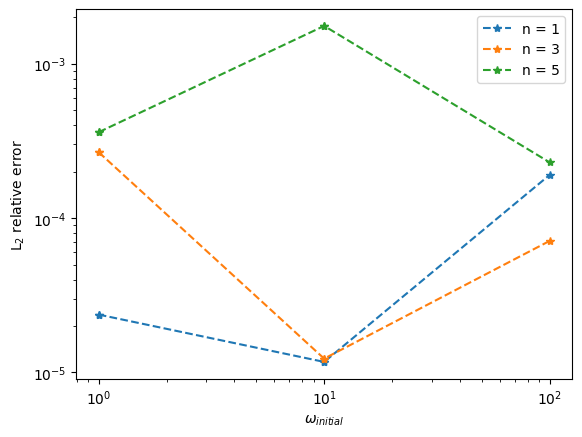

In [28]:
plot_weights(df_pde, [1, 3, 5], 5, 20)

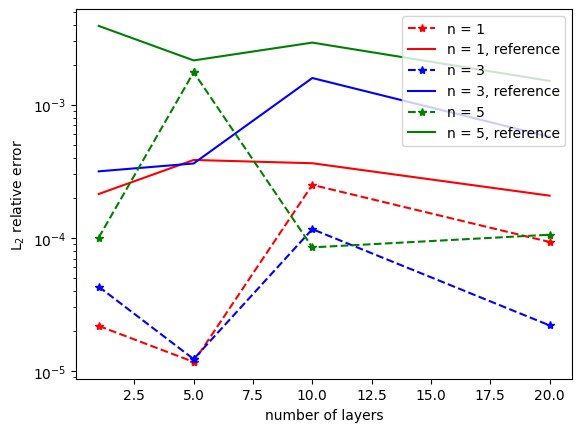

In [29]:
plot_layers(df_pde, df_function, [1, 3, 5], 20, 10)

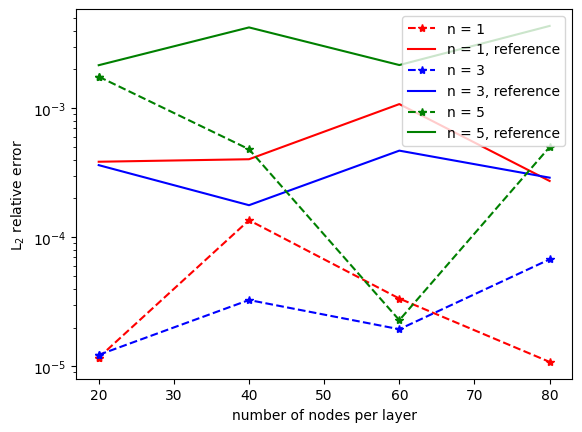

In [30]:
plot_nodes(df_pde, df_function, [1, 3, 5], 5, 10)

In [16]:
def extract_n_serie(df, num_dense, num_nodes, weights):
    filter_statement = (df['num_dense'] == num_dense) & (df['num_nodes'] == num_nodes) & (df['weights'] == weights)
    df_filtered = filter_df(df, filter_statement, 'n')
    return df_filtered

In [20]:
pde_ns = extract_n_serie(df_pde, 5, 60, 10)
ref_ns = filter_df(df_function, (df_function['num_dense'] == 5) & (df_function['num_nodes'] == 60), 'n')
ref_ns

,n,num_dense,num_nodes,num_train,num_test,test_metric
18,1,5,60,32,100,0.001077
26,2,5,60,32,100,0.000843
21,3,5,60,32,100,0.000469
27,4,5,60,32,100,0.002414
24,5,5,60,32,100,0.002162


In [18]:
def plot_n_graph(df_pde, df_function):
    plt.plot(df_pde['n'], df_pde['test_metric'], '*--', label='PINN for fixed n')
    plt.plot(df_function['n'], df_function['test_metric'], '*-', label='reference')
    
    plt.xlabel('n')
    plt.ylabel('L$_2$ relative error')
    plt.yscale('log')
    plt.legend()
    plt.savefig('ns.png')

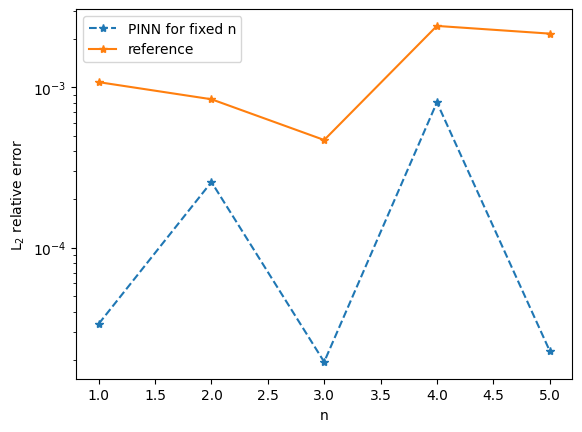

In [21]:
plot_n_graph(pde_ns, ref_ns)